In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the file is encoded in 'latin1'
df = pd.read_csv('alexa.csv', delimiter='\t', encoding='latin1')


In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(3149, 5)

## Converting review text in lowercase

In [10]:
df['cleaned_text'] = df['verified_reviews'].apply(lambda x: x.lower())

In [11]:
df.sample(5)

,rating,date,variation,verified_reviews,feedback,cleaned_text
551,1,14-Jun-18,Black,product stopped working after return time ran out,0,product stopped working after return time ran out
1125,5,29-Jul-18,Black Spot,Love it. Small with good sound,1,love it. small with good sound
2764,5,30-Jul-18,Black Dot,It is just not as loud as I thought it was goi...,1,it is just not as loud as i thought it was goi...
960,5,29-Jul-18,Oak Finish,Love my Echo,1,love my echo
840,3,30-Jul-18,Sandstone Fabric,it's annoying that everything they show Alexa ...,1,it's annoying that everything they show alexa ...


## Removing all punctuations from review text

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

In [14]:
df.sample(5)

,rating,date,variation,verified_reviews,feedback,cleaned_text
1264,5,25-Jul-18,White Spot,I love my echo spot!,1,i love my echo spot
2950,5,30-Jul-18,Black Dot,"Great product, fun to use!!",1,great product fun to use
2446,5,30-Jul-18,Configuration: Fire TV Stick,Great entertainment,1,great entertainment
1816,5,29-Jul-18,White Plus,I purchased the Amazon Echo Plus on Amazon pri...,1,i purchased the amazon echo plus on amazon pri...
1963,5,25-Jul-18,Black Plus,No problems whatsoever makes life easy and sou...,1,no problems whatsoever makes life easy and sou...


## Removing emoji icons

In [15]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons 😊
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs - 🔥
                           u"\U0001F680-\U0001F6FF" # transport & map symbols - 🚀
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS) 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [16]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x:remove_emoji(x))

In [17]:
df['cleaned_text'][2012]

'i was suppose to get the \x93free\x94 lightbulb with purchase it did not come with echo upon reading more carefully it says to click a box to receive free bulb  of course i want the free bulb who wouldn\x92t just a sneaky way for them to get out of having to give so many \x93 free\x94  bulbs away disappointed  i have yet to set up my echo our first purchase on any alexia device debating if we want to keep it it did come quickly with my prime membership'

## Tokenization :

In [18]:
import nltk
from nltk.tokenize import word_tokenize

df['tokenized'] = df['cleaned_text'].apply(lambda x:word_tokenize(x))

In [19]:
df['tokenized']

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: tokenized, Length: 3149, dtype: object

## Removing stop words from tokenized text :

In [20]:
from nltk.corpus import stopwords

In [21]:
sw = set(stopwords.words('english'))

In [22]:
df['tokenized'] = df['tokenized'].apply(lambda x: " ".join([i for i in x if i not in sw]))

In [23]:
df['tokenized'] = df['tokenized'].apply(lambda x: x.split())

In [24]:
df['tokenized']

0                                            [love, echo]
1                                                 [loved]
2       [sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [music]
                              ...                        
3145                    [perfect, kids, adults, everyone]
3146    [listening, music, searching, locations, check...
3147    [love, things, running, entire, home, tv, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [good]
Name: tokenized, Length: 3149, dtype: object

## Stemming:

In [45]:
from nltk.stem import SnowballStemmer

In [47]:
ps = SnowballStemmer(language='english')

In [48]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized,stemmed_text,sentiment_score,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]",love echo,0.6369,positve
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved],love,0.5994,positve
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometim play game answer question correctli al...,-0.1280,negative
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing 4 yr old learn dinosaur control ...,0.9169,positve
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music],music,0.0000,neutral


In [49]:
df['stemmed_text'] = df['tokenized'].apply(lambda x: " ".join([ps.stem(word) for word in x]))

In [50]:
df['stemmed_text']

0                                               love echo
1                                                    love
2       sometim play game answer question correct alex...
3       lot fun thing 4 yr old learn dinosaur control ...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti isnt great most use co...
3149                                                 good
Name: stemmed_text, Length: 3149, dtype: object

## Bag of Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

In [31]:
vectorizer.fit(df['stemmed_text'])

CountVectorizer(stop_words='english')

In [32]:
len(vectorizer.get_feature_names_out())

3195

In [33]:
x = vectorizer.transform(df['stemmed_text'])

df_bow = pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names_out())

In [34]:
df_bow

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,...,youtubeit,yr,yup,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF:

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

df_tfidf = tfidf.fit_transform(df['stemmed_text'])

In [36]:
df_tfidf = df_tfidf.toarray()

In [37]:
df_tfidf = pd.DataFrame(df_tfidf,columns=tfidf.get_feature_names_out())

In [38]:
df_tfidf.head()

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,...,youtubeit,yr,yup,zero,zigbe,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.335475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plot graph for positive and negative feedback

In [39]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

si = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Chaitanya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: si.polarity_scores(x)['compound'])

In [41]:
def sentiment_func(n):
    if(n > 0):
        return 'positve'
    elif (n < 0) :
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(lambda x: sentiment_func(x))

In [42]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized,stemmed_text,sentiment_score,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]",love echo,0.6369,positve
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved],love,0.5994,positve
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometim play game answer question correctli al...,-0.1280,negative
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing 4 yr old learn dinosaur control ...,0.9169,positve
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music],music,0.0000,neutral


<Axes: xlabel='sentiment', ylabel='count'>

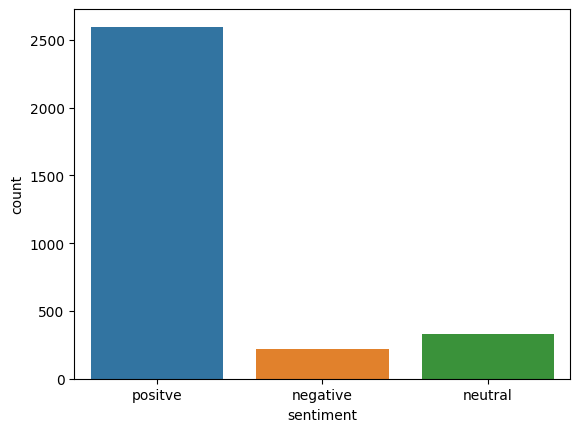

In [43]:
sns.countplot(data=df,x='sentiment')

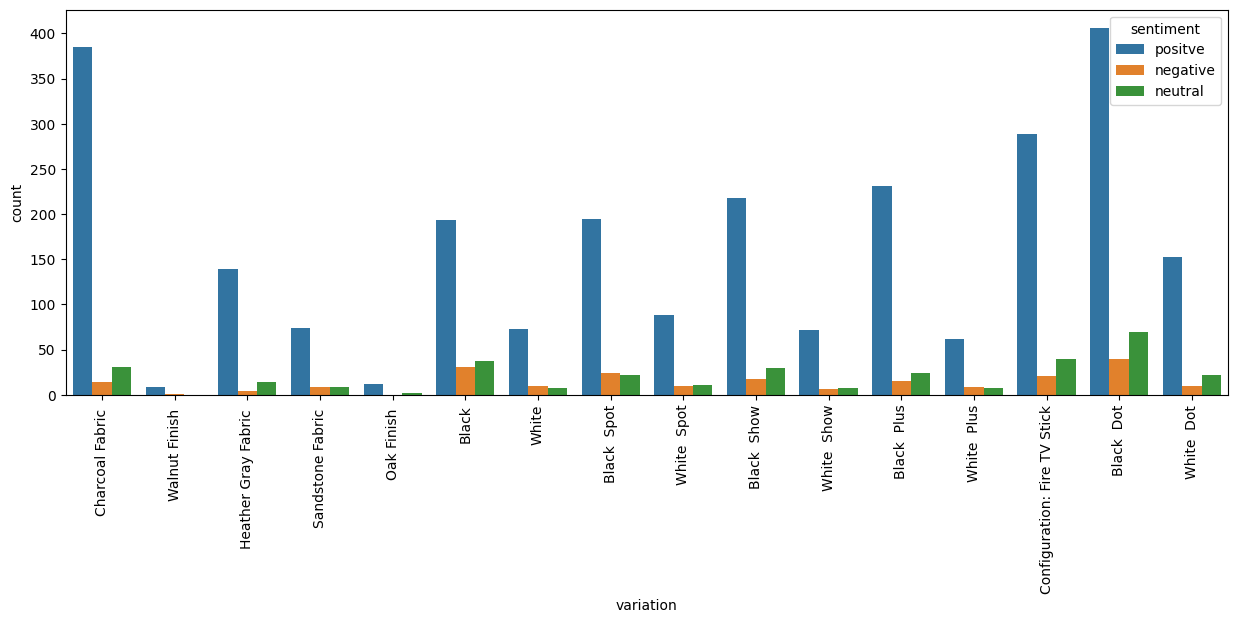

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='variation',hue='sentiment')
plt.xticks(rotation=90)
plt.show()